In [1]:
from nanopyx.data.download import ExampleDataManager
from nanopyx.liquid import Radiality, CRShiftAndMagnify
import numpy as np

downloader = ExampleDataManager()
image = downloader.get_ZipTiffIterator(
    "SMLMS2013_HDTubulinAlexa647", as_ndarray=True)


interpolator = CRShiftAndMagnify()
image_interp = interpolator.run(image,0,0,1,1,run_type='Threaded')
image_interp = np.array(image_interp)

/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/__njit__.py:15: UserWarning: Numba is not installed. Using pure python for _njit_interpolate
  warnings.warn(
/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/__njit__.py:15: UserWarning: Numba is not installed. Using pure python for njit_shift_magnify
  warnings.warn(
/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/__njit__.py:15: UserWarning: Numba is not installed. Using pure python for njit_shift_scale_rotate
  warnings.warn(
/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/_le_mandelbrot_benchmark_.py:17: UserWarning: Numba is not installed. Using pure python for _njit_mandelbrot
  warnings.warn(
/Users/abrito/Documents/GitHub/NanoPyx/src/nanopyx/liquid/_le_mandelbrot_benchmark_.py:17: UserWarning: Numba is not installed. Using pure python for njit_mandelbrot
  warnings.warn(


If you find the 'SMLMS2013_HDTubulinAlexa647' dataset useful, please cite: Nicolas Olivier, & Debora Keller, Zenodo, 2023 - https://doi.org/10.5281/zenodo.7620025


Fastest run type: Threaded_dynamic
Slowest run type: Unthreaded


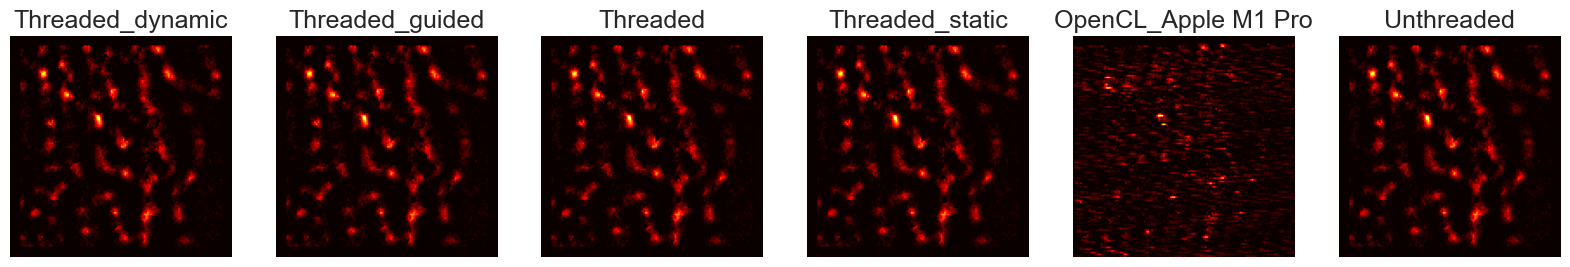

In [2]:
rad = Radiality(testing=True)
bench_values = rad.benchmark(image, image_interp, magnification=1, ringRadius=5, border=5, radialityPositivityConstraint=True, doIntensityWeighting=True)

images = []
titles = []
run_times = [] 

# unzip the values
for run_time, title, image in bench_values:
    run_times.append(run_time)
    titles.append(title)
    images.append(image[0,:,:])
    
# show images in seaborn
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_context("talk")
fig, axes = plt.subplots(1, len(images), figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="hot")
    ax.set_title(titles[i])
    ax.axis("off")
plt.show()